In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
#正規化
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


In [2]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [11]:
#k折驗證
import numpy as np
k = 4
num_val_sample = len(train_data)//k
num_epochs = 500
all_mae = []
for i in range(k):
    print("processing fold #", i)
    val_data = train_data[i*num_val_sample: (i+1)*num_val_sample]
    val_targets = train_targets[i*num_val_sample: (i+1)*num_val_sample]
    partial_train_data = np.concatenate([train_data[:i*num_val_sample], train_data[(i+1)*num_val_sample:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_sample], train_targets[(i+1)*num_val_sample:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose=0, validation_data = (val_data, val_targets))
    print(history.history.keys())
    mae_history = history.history["val_mae"]
    all_mae.append(mae_history)
average_mae = [np.mean([x[i] for x in all_mae]) for i in range(num_epochs)]

processing fold # 0
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold # 1
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold # 2
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold # 3
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


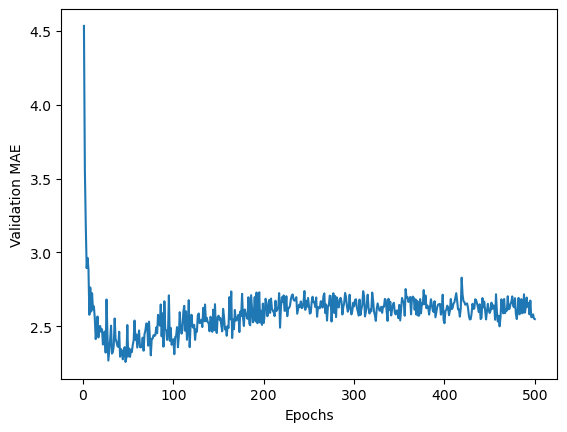

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae)+1), average_mae)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

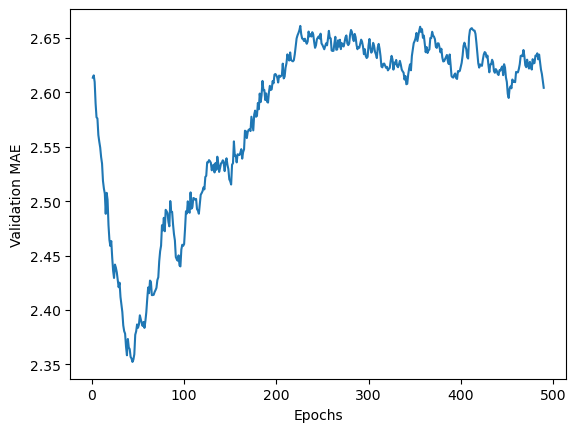

In [17]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae = smooth_curve(average_mae[10:])
plt.plot(range(1, len(smooth_mae)+1), smooth_mae)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)